In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:/Study/Dataset/phishing_site_urls.csv')

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
len(df)

549346

In [7]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
# To see that the dataset are balanced or imbalanced
label_counts = pd.DataFrame(df.Label.value_counts())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Label'>

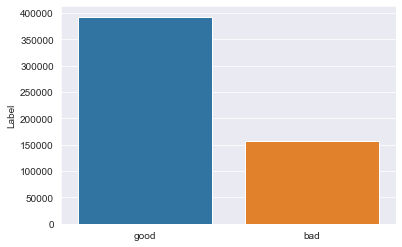

In [9]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

### Pre-Processing

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-za-z]+')

In [11]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
# this will be pull letter which matches the expression
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 '_profile',
 'ach',
 'outdated_page_tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login_access']

In [13]:
import time
print('Getting words tokenized...')
t0 = time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter()-t0
print('Time Taken',t1,'sec')

Getting words tokenized...
Time Taken 2.5069884000000116 sec


In [14]:
df.sample(5)

,URL,Label,text_tokenized
466287,worldstarhiphop.com/videos/video.php?v=wshhB22...,good,"[worldstarhiphop, com, videos, video, php, v, ..."
356432,icaic.ca/,good,"[icaic, ca]"
83895,www.esalesbiz.com/web/nntp.htm,good,"[www, esalesbiz, com, web, nntp, htm]"
533965,www.gebrvanorsouw.nl/g76gyui,bad,"[www, gebrvanorsouw, nl, g, gyui]"
110431,sevname.com/wp-content/themes/wpthemeone/doc09...,bad,"[sevname, com, wp, content, themes, wpthemeone..."


In [15]:
# Snow ball stemmer
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
print('Getting words stemmed...')
t0 = time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1 = time.perf_counter()-t0
print('Time taken',t1,'sec')

Getting words stemmed...
Time taken 47.51961700000001 sec


In [18]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
83236,www.uwm.edu/Libraries/courses/wiki/,good,"[www, uwm, edu, Libraries, courses, wiki]","[www, uwm, edu, librari, cours, wiki]"
352907,hockeyfights.com/players/4466,good,"[hockeyfights, com, players]","[hockeyfight, com, player]"
192618,genforum.genealogy.com/cupp/page4.html,good,"[genforum, genealogy, com, cupp, page, html]","[genforum, genealog, com, cupp, page, html]"
462855,wellness.com/dir/426369/chiropractor/ny/monroe...,good,"[wellness, com, dir, chiropractor, ny, monroe,...","[well, com, dir, chiropractor, ny, monro, kenn..."
44317,rahmat-stema-wana.p.ht/rahmat/logs.php,bad,"[rahmat, stema, wana, p, ht, rahmat, logs, php]","[rahmat, stema, wana, p, ht, rahmat, log, php]"


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
print('Getting Joining Words...')
t0 = time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1 = time.perf_counter()-t0
print('Time Taken',t1,'Sec')

Getting Joining Words...
Time Taken 0.26248140000001285 Sec


In [20]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
446128,therestorationmovement.com/smith%2Cjohn.htm,good,"[therestorationmovement, com, smith, Cjohn, htm]","[therestorationmov, com, smith, cjohn, htm]",therestorationmov com smith cjohn htm
431777,skillwho.com/users/painting/me/thomaston/kelle...,good,"[skillwho, com, users, painting, me, thomaston...","[skillwho, com, user, paint, me, thomaston, ke...",skillwho com user paint me thomaston kelley gu...
407376,nuttymp3.com/download/josh-mahi-ve-arz-kra,good,"[nuttymp, com, download, josh, mahi, ve, arz, ...","[nuttymp, com, download, josh, mahi, ve, arz, ...",nuttymp com download josh mahi ve arz kra
440947,supremelaw.org/cc/shubb/index.htm,good,"[supremelaw, org, cc, shubb, index, htm]","[supremelaw, org, cc, shubb, index, htm]",supremelaw org cc shubb index htm
45272,www157.paypal.co.uk.97568.ssl-980.mx/js/webapp...,bad,"[www, paypal, co, uk, ssl, mx, js, webapps, uk...","[www, paypal, co, uk, ssl, mx, js, webapp, uk,...",www paypal co uk ssl mx js webapp uk mpp cmnd ...


### Creating Model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()

In [23]:
feature = cv.fit_transform(df.text_sent)

In [24]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,df.Label)


### Logistics Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(x_test,y_test)

0.963498547368881

In [33]:
from sklearn.pipeline import make_pipeline
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),LogisticRegression())

In [34]:
x_train,x_test,y_train,y_test = train_test_split(df.URL,df.Label)

In [35]:
pipeline_ls.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [36]:
pipeline_ls.score(x_test,y_test)

0.9669062233775312

In [40]:
import pickle
pickle.dump(pipeline_ls,open('phish.pkl','wb'))

In [41]:
loaded_model = pickle.load(open('phishing.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9669062233775312
